In [2]:
%pylab inline
import pandas as pd
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

Populating the interactive namespace from numpy and matplotlib


In [7]:
perfs = pd.read_csv('equal-weight-strategies-perfs.csv')
perfs = perfs.drop(['Unnamed: 0', 'count'], axis=1)

In [10]:
perfs.head()

,mean,std,min,25%,50%,75%,max,sterling_ratio,market_condition,trading_frequency,strategy
0,0.542416,0.595397,-0.115987,0.116635,0.603905,1.029686,1.077841,5.235947,bull,hi,buyholdstrategy
1,0.710573,0.737231,-0.090990,0.172065,0.789982,1.328490,1.353318,6.948275,bull,hi,buffedcoinstrategy
2,0.666940,0.677279,-0.093593,0.190675,0.759720,1.235985,1.241913,7.016105,bull,hi,peakriderstrategy
3,0.548117,0.591044,-0.115987,0.133738,0.615307,1.029686,1.077841,6.274246,bull,mid,buyholdstrategy
4,0.712449,0.772150,-0.130633,0.155376,0.766886,1.323959,1.446659,8.277779,bull,mid,buffedcoinstrategy


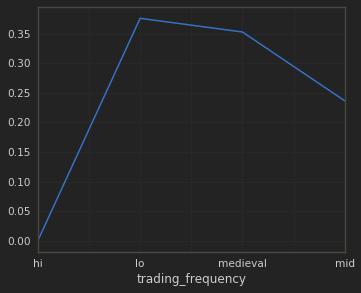

In [19]:
perfs.groupby('trading_frequency').median()['50%'].plot()

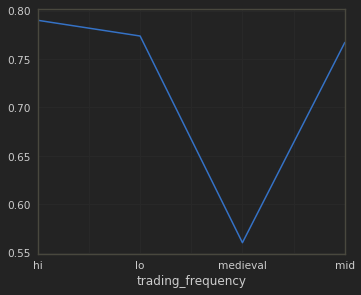

In [18]:
perfs.groupby('trading_frequency').max()['50%'].plot()

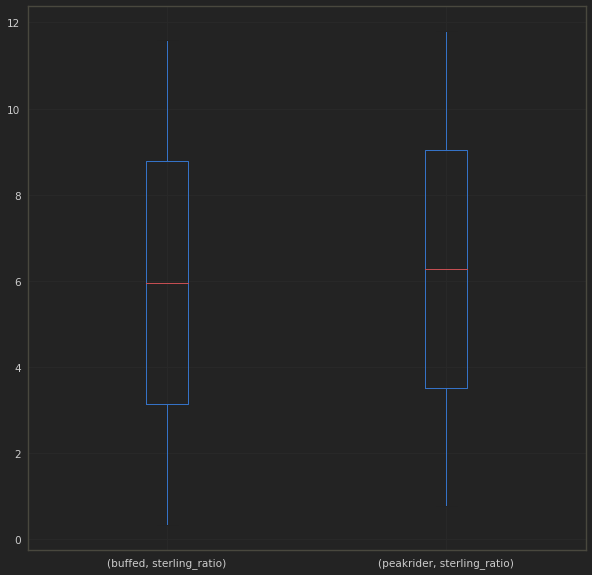

In [28]:
def sterlings (stratname):
    s = perfs[(perfs['strategy'] == stratname) &
              (perfs['trading_frequency'] == 'lo')
             ]['sterling_ratio']
    s = s.reset_index()
    s = s.drop(['index'], axis=1)
    return s

buffed_sterl = sterlings('buffedcoinstrategy')
pr_sterl     = sterlings('peakriderstrategy')

pd.concat([pr_sterl, buffed_sterl], keys=['buffed', 'peakrider'], axis=1).plot.box(figsize=(10,10))